# Assignment Q1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

In [2]:
# Set the number of nodes (N > 1000)
N = 1500

# Generate a random undirected graph using Erdős–Rényi model with edge probability p
p = 0.005  # Adjust probability to achieve N > 1000 and sparsity

# Initialize adjacency matrix
adjacency_matrix = np.zeros((N, N), dtype=int)

# Generate edges randomly (without self-loops)
edges = []
for i in range(N):
    for j in range(i + 1, N):
        if np.random.rand() < p:
            adjacency_matrix[i][j] = 1
            adjacency_matrix[j][i] = 1
            edges.append((i, j))

In [3]:
# Print the adjacency matrix (small portion for demonstration)
print("Adjacency Matrix:")
print(adjacency_matrix[:5, :5])

# Print the edge list (first few edges for demonstration)
print("\nEdge List:")
for e in edges[:5]:
    print(f"Node {e[0]} connected to Node {e[1]}")

Adjacency Matrix:
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

Edge List:
Node 0 connected to Node 181
Node 0 connected to Node 341
Node 0 connected to Node 681
Node 0 connected to Node 739
Node 0 connected to Node 745


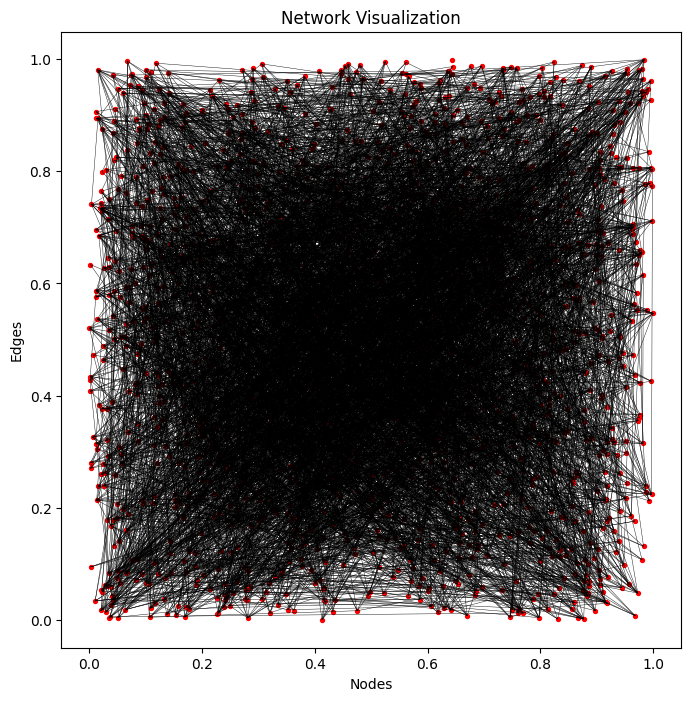

In [4]:
# (b) Visualize the network
positions = np.random.rand(N, 2)
plt.figure(figsize=(8,8))
for e in edges:
    x = [positions[e[0],0], positions[e[1],0]]
    y = [positions[e[0],1], positions[e[1],1]]
    plt.plot(x, y, 'k-', linewidth=0.3)
plt.scatter(positions[:,0], positions[:,1], s=8, c='r')
plt.title("Network Visualization")
plt.xlabel("Nodes")
plt.ylabel("Edges")
plt.savefig("network_visualization.png")
plt.show()

In [5]:
# (c) Compute sparseness
max_possible_edges = N * (N - 1) / 2
sparseness = len(edges) / max_possible_edges

print("\n(c) Sparseness:", sparseness)


(c) Sparseness: 0.004996219702023571


In [6]:
# (d) Compute average degree <k>
degrees = np.sum(adjacency_matrix, axis=1)
average_degree = np.mean(degrees)

print("\n(d) Average Degree:", average_degree)


(d) Average Degree: 7.489333333333334


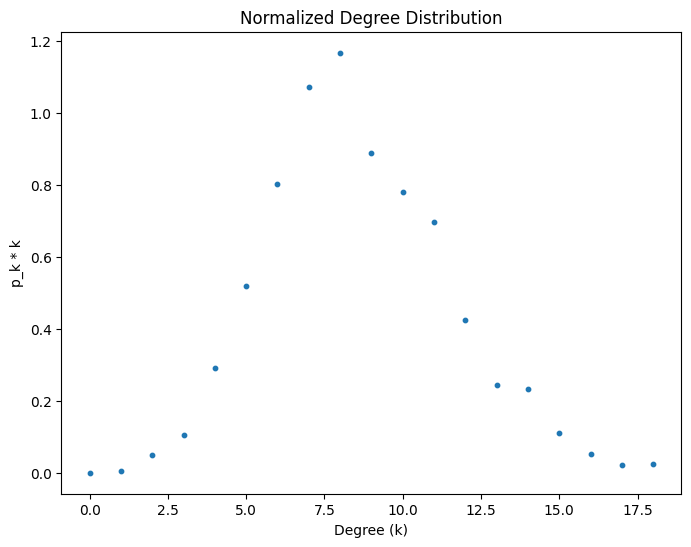

In [7]:
# (e) Compute and plot normalized degree distribution P(k)
unique_degs, counts = np.unique(degrees, return_counts=True)
p_k = counts / float(N)
scaled_pk = unique_degs * p_k

plt.figure(figsize=(8, 6))
plt.scatter(unique_degs, scaled_pk, s=10)
plt.title("Normalized Degree Distribution")
plt.xlabel("Degree (k)")
plt.ylabel("p_k * k")
plt.savefig("degree_distribution.png")
plt.show()

In [8]:
# (f) Compute Average Path Length using BFS and plot average path length distribution
def average_path_length(adjacency_matrix):
    all_pairs = []
    for start in range(N):
        shortest_paths = {}
        visited = {start: 0}
        queue = [start]

        while queue:
            node = queue.pop(0)
            for neighbor, edge in enumerate(adjacency_matrix[node]):
                if edge == 1 and neighbor not in visited:
                    visited[neighbor] = visited[node] + 1
                    queue.append(neighbor)

        # Filter out unreachable nodes (incomplete graph)
        shortest_paths.update({n: d for n, d in visited.items() if d > 0})
        all_pairs.extend(shortest_paths.values())

    return all_pairs, sum(all_pairs) / len(all_pairs)

# Compute average path lengths
all_pairs, average_path_lengths = average_path_length(adjacency_matrix)
print("\n(f) Average Path Length:", average_path_lengths)


(f) Average Path Length: 3.846768403116393


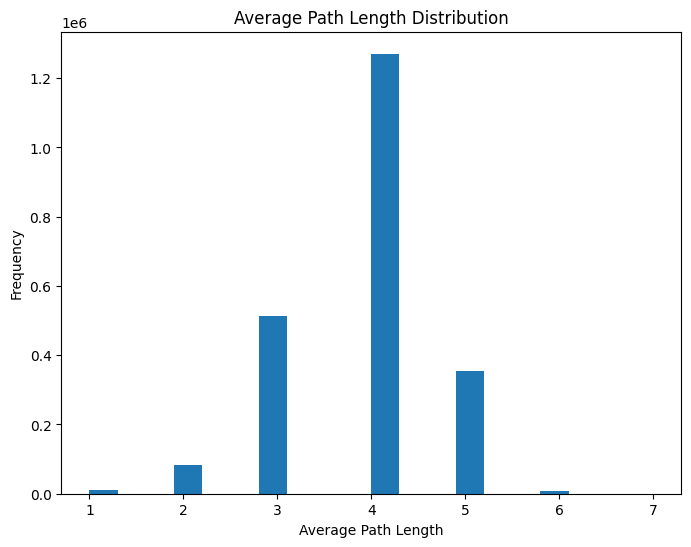

In [9]:
# Plot average path length distribution
plt.figure(figsize=(8, 6))
plt.hist(all_pairs, bins=20)
plt.title("Average Path Length Distribution")
plt.xlabel("Average Path Length")
plt.ylabel("Frequency")
plt.savefig("average_path_length.png")
plt.show()


(g) Average Clustering Coefficient: 0.004542104192104192


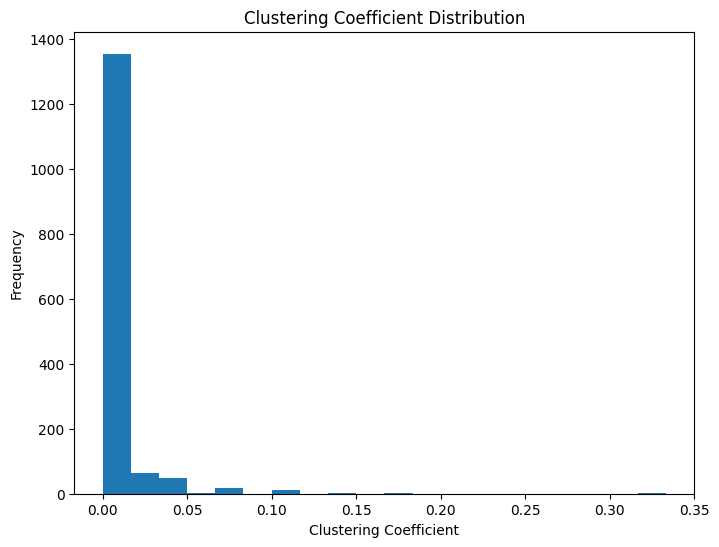

In [10]:
# (g) Compute Average Clustering Coefficient
def clustering_coefficient(node):
    neighbors = []
    for i in range(N):
        if adjacency_matrix[node][i] == 1 and i != node:
            neighbors.append(i)
    k = len(neighbors)
    if k < 2:
        return 0.0

    # Count common neighbors
    common_neighbors = 0
    for i in range(len(neighbors)):
        for j in range(i + 1, len(neighbors)):
            if adjacency_matrix[neighbors[i]][neighbors[j]] == 1:
                common_neighbors += 1

    c = (2 * common_neighbors) / (k * (k - 1))
    return c

# Compute clustering coefficients
clustering_coeffs = []
for node in range(N):
    cc = clustering_coefficient(node)
    clustering_coeffs.append(cc)

average_cc = np.mean(clustering_coeffs)

print("\n(g) Average Clustering Coefficient:", average_cc)

# Plot clustering coefficient distribution
plt.figure(figsize=(8, 6))
plt.hist(clustering_coeffs, bins=20)
plt.title("Clustering Coefficient Distribution")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.savefig("cc_distribution.png")
plt.show()